In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import display,HTML
import os
from pylab import rcParams
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
from __future__ import division
from geopandas import GeoDataFrame

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4

In [102]:
#Reading the file
df = pd.read_csv('/Users/yashpasar/Downloads/DOB_Permit_Issuance-2.csv', sep = ',', low_memory=False)
pd.set_option('display.max_columns', 100)

In [4]:
df.columns

Index([u'BOROUGH', u'Bin #', u'House #', u'Street Name', u'Job #',
       u'Job doc. #', u'Job Type', u'Self_Cert', u'Block', u'Lot',
       u'Community Board', u'Zip Code', u'Bldg Type', u'Residential',
       u'Special District 1', u'Special District 2', u'Work Type',
       u'Permit Status', u'Filing Status', u'Permit Type',
       u'Permit Sequence #', u'Permit Subtype', u'Oil Gas', u'Site Fill',
       u'Filing Date', u'Issuance Date', u'Expiration Date', u'Job Start Date',
       u'Permittee's First Name', u'Permittee's Last Name',
       u'Permittee's Business Name', u'Permittee's Phone #',
       u'Permittee's License Type', u'Permittee's License #',
       u'Act as Superintendent', u'Permittee's Other Title', u'HIC License',
       u'Site Safety Mgr's First Name', u'Site Safety Mgr's Last Name',
       u'Site Safety Mgr Business Name', u'Superintendent First & Last Name',
       u'Superintendent Business Name', u'Owner's Business Type',
       u'Non-Profit', u'Owner's Business

In [5]:
#Dropping unwanted colmuns to narrow down my investigation
df.drop(['Bin #', 'Job #', 'Job doc. #', 'Job Type', 'Self_Cert', 'Lot', 'Community Board', 'Oil Gas', 'Site Fill',
         "Permittee's Phone #", "Permittee's License Type", "Permittee's License #",
       "Act as Superintendent", "Permittee's Other Title", "HIC License",
       "Site Safety Mgr's First Name", "Site Safety Mgr's Last Name",
       "Site Safety Mgr Business Name", "Superintendent First & Last Name", "Owner's Phone #", "DOBRunDate",
       "PERMIT_SI_NO", "Superintendent Business Name"], axis=1, inplace=True)

In [6]:
df.shape

(3509983, 37)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Zip Code,3507758.0,10636.963351,600.101140,0.000000,10022.000000,10457.000000,11226.000000,11697.000000
Bldg Type,3455506.0,1.758564,0.427954,1.000000,2.000000,2.000000,2.000000,2.000000
Permit Sequence #,3509983.0,1.487761,1.149457,1.000000,1.000000,1.000000,2.000000,29.000000
LATITUDE,3497702.0,40.725163,0.072998,40.498628,40.683871,40.736658,40.765963,40.913711
LONGITUDE,3497702.0,-73.945769,0.084450,-74.254886,-73.988679,-73.961883,-73.904726,-73.700376
COUNCIL_DISTRICT,3497702.0,20.112199,16.355407,1.000000,4.000000,18.000000,34.000000,51.000000
CENSUS_TRACT,3497702.0,6392.085189,21249.521771,1.000000,96.000000,216.000000,723.000000,157903.000000


In [8]:
df.dtypes

BOROUGH                       object
House #                       object
Street Name                   object
Block                         object
Zip Code                     float64
Bldg Type                    float64
Residential                   object
Special District 1            object
Special District 2            object
Work Type                     object
Permit Status                 object
Filing Status                 object
Permit Type                   object
Permit Sequence #              int64
Permit Subtype                object
Filing Date                   object
Issuance Date                 object
Expiration Date               object
Job Start Date                object
Permittee's First Name        object
Permittee's Last Name         object
Permittee's Business Name     object
Owner's Business Type         object
Non-Profit                    object
Owner's Business Name         object
Owner's First Name            object
Owner's Last Name             object
O

In [9]:
df.head()

,BOROUGH,House #,Street Name,Block,Zip Code,Bldg Type,Residential,Special District 1,Special District 2,Work Type,Permit Status,Filing Status,Permit Type,Permit Sequence #,Permit Subtype,Filing Date,Issuance Date,Expiration Date,Job Start Date,Permittee's First Name,Permittee's Last Name,Permittee's Business Name,Owner's Business Type,Non-Profit,Owner's Business Name,Owner's First Name,Owner's Last Name,Owner's House #,Owner's House Street Name,Owner’s House City,Owner’s House State,Owner’s House Zip Code,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,CENSUS_TRACT,NTA_NAME
0,MANHATTAN,353,EAST 68TH STREET,01443,10065.0,2.0,NaN,NaN,NaN,OT,ISSUED,INITIAL,EW,1,OT,03/28/2019 12:00:00 AM,03/28/2019 12:00:00 AM,04/16/2019 12:00:00 AM,03/28/2019 12:00:00 AM,RYAN,KIEFER,MEMORIAL SLOAN-KETTERING,CORPORATION,Y,MEMORIAL SLOAN KETTERING,EDWARD,MAHONEY,1275,YORK AVENUE,NEW YORK,NY,10065,40.765726,-73.958994,5.0,118.0,Lenox Hill-Roosevelt Island
1,BRONX,480,EAST 138 STREET,02282,10454.0,2.0,YES,NaN,NaN,MH,ISSUED,INITIAL,EW,1,MH,03/28/2019 12:00:00 AM,03/28/2019 12:00:00 AM,07/21/2019 12:00:00 AM,03/28/2019 12:00:00 AM,MOSHEREF,HUSSAIN,MOON CONSTRUCTION INC,PARTNERSHIP,N,ROCKAWAY CAPITAL PARTNERS,URI,DREIFUS,207,ROCKAWAY TURNPIKE,LAWRENCE,NY,11559,40.808137,-73.920616,8.0,25.0,Mott Haven-Port Morris
2,BROOKLYN,30,REMSEN STREET,00251,11201.0,2.0,YES,LH-1,NaN,MH,ISSUED,INITIAL,EW,1,MH,03/28/2019 12:00:00 AM,03/28/2019 12:00:00 AM,03/27/2020 12:00:00 AM,03/28/2019 12:00:00 AM,HARRY,GIANNATOS,OZ BOSPH CONSTRUCTION COR,CONDO/CO-OP,N,NaN,JESSIE,LEIKEN,30,REMSEN STREET,BROOKLYN,NY,11201,40.694847,-73.997238,33.0,301.0,Brooklyn Heights-Cobble Hill
3,QUEENS,51-35,REEDER ST,01549,11373.0,2.0,YES,NaN,NaN,NaN,ISSUED,RENEWAL,NB,8,NaN,03/28/2019 12:00:00 AM,03/28/2019 12:00:00 AM,06/30/2019 12:00:00 AM,06/04/2015 12:00:00 AM,SIME,SPADINA,STRUCTURAL LAND MANAGEMEN,PARTNERSHIP,N,85-15 QUEENS BLVD REALTY,JAMES,PI,136-18,39 AVE,FLUSHING,NY,11354,40.737942,-73.878281,25.0,473.0,Elmhurst
4,QUEENS,131-24,SPRINGFIELD BOULEVARD,12729,11413.0,2.0,NaN,NaN,NaN,EQ,ISSUED,RENEWAL,EQ,2,FN,03/28/2019 12:00:00 AM,03/28/2019 12:00:00 AM,03/27/2020 12:00:00 AM,09/26/2018 12:00:00 AM,AGO,KOLENOVIC,AGO & ALAUDIN GENERAL CON,CORPORATION,Y,"ANJIMAN E. BADRI, NY MASJID",SHABBIR,BURHANI,131-24,SPRINGFIELD GARDEN,QUEENS,NY,11413,40.683608,-73.751320,27.0,352.0,St. Albans


In [9]:
#Renaming Columns 
df.columns = ['Borough', 'House No.', 'Street Name', 'Block', 'Zip Code', 'Bldg Type', 'Residential', 'Special District 1', 'Special District 2',
              'Work Type', 'Permit Status', 'Filing Status', 'Permit Type', 'Permit Sequence No.', 'Permit Subtype', 
              'Filing Date', 'Issuance Date', 'Expiration Date', 'Job Start Date',
              'Permittee First Name', 'Permittee Last Name', 'Permittee Business Name', 'Owners Business Type',
              'Non-Profit', 'Owners Business Name', 'Owners First Name', 'Owners Last Name', 'Owners House No.', 
              'Owners House Street Name', 'Owners House City', 'Owners House State', 'Owners House Zip Code','LATITUDE',
              'LONGITUDE', 'COUNCIL_DISTRICT', 'CENSUS_TRACT', 'NTA_NAME']

In [10]:
df.dtypes

Borough                      object
House No.                    object
Street Name                  object
Block                        object
Zip Code                    float64
Bldg Type                   float64
Residential                  object
Special District 1           object
Special District 2           object
Work Type                    object
Permit Status                object
Filing Status                object
Permit Type                  object
Permit Sequence No.           int64
Permit Subtype               object
Filing Date                  object
Issuance Date                object
Expiration Date              object
Job Start Date               object
Permittee First Name         object
Permittee Last Name          object
Permittee Business Name      object
Owners Business Type         object
Non-Profit                   object
Owners Business Name         object
Owners First Name            object
Owners Last Name             object
Owners House No.            

In [11]:
#Grouping Permits by Owner's Business Type
permits_by_Business_type = df.groupby(["Owners Business Type"]).size()
permits_by_Business_type

Owners Business Type
CONDO/CO-OP             87125
CORPORATION           1130636
DCAS                     1199
DOE                       952
HHC                      1277
HPD                      6865
INDIVIDUAL            1107190
NY STATE                 1178
NYC AGENCY               6916
NYCHA                   11525
NYCHA/HHC                9164
OTHER                  155931
OTHER GOV'T AGENCY      55796
PARTNERSHIP            769640
dtype: int64

In [12]:
#Sorting in descending order
permits_by_Business_type.sort_values(ascending=False, inplace=True)
permits_by_Business_type

Owners Business Type
CORPORATION           1130636
INDIVIDUAL            1107190
PARTNERSHIP            769640
OTHER                  155931
CONDO/CO-OP             87125
OTHER GOV'T AGENCY      55796
NYCHA                   11525
NYCHA/HHC                9164
NYC AGENCY               6916
HPD                      6865
HHC                      1277
DCAS                     1199
NY STATE                 1178
DOE                       952
dtype: int64

Text(0.5,1,'Heatmap of dataset')

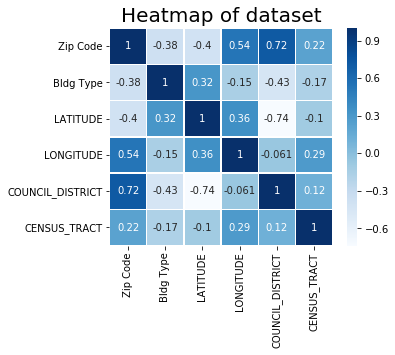

In [13]:
#Creating a heatmap to understand the correlation between columns in this dataset
hm= sb.heatmap(df[['Zip Code', 'Bldg Type', 'LATITUDE', 'LONGITUDE', 'COUNCIL_DISTRICT', 'CENSUS_TRACT']].corr(), 
               annot = True , linewidths= 0.5, cmap='Blues')
hm.set_title(label='Heatmap of dataset', fontsize=20)

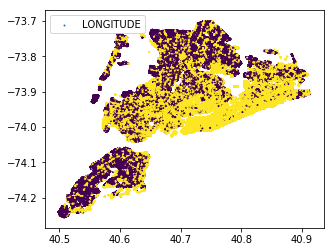

In [14]:
#Plotting a map of NYC based on the coordinates & segregating the city on the Building type
plt.scatter(x=df["LATITUDE"],y=df["LONGITUDE"],s=1,c=df["Bldg Type"])
plt.legend()

In [15]:
df['Permit Status'].unique()

array(['ISSUED', 'RE-ISSUED', nan, 'IN PROCESS', 'REVOKED'], dtype=object)

In [17]:
#Checking the Count for each type of Permit Status
permits_by_type = df.groupby(df['Permit Status']).size()
permits_by_type

Permit Status
IN PROCESS      20014
ISSUED        3434808
RE-ISSUED       44347
REVOKED             4
dtype: int64

Text(0.5,1,'Types of Permit Status')

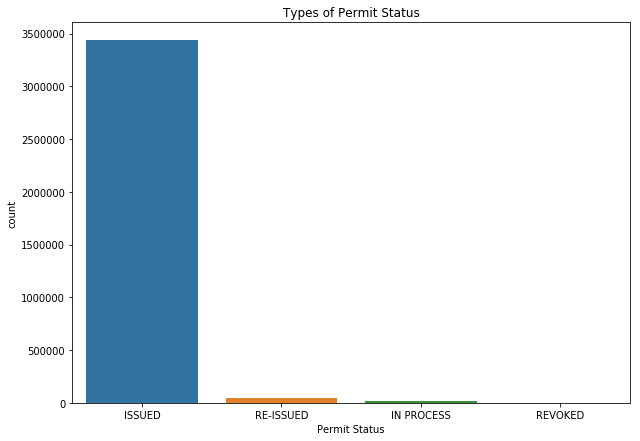

In [18]:
#Plotting a Bar Chart to view different types of Permit Status
fig = plt.figure(figsize=(10,7))
fig.add_subplot(1,1,1)
sb.countplot(x="Permit Status", data=df);
plt.title("Types of Permit Status")

In [19]:
df['Work Type'].unique()

array(['OT', 'MH', nan, 'EQ', 'PL', 'SD', 'BL', 'SP', 'FB', 'FP', 'FS',
       'CC', 'FA', 'NB'], dtype=object)

In [20]:
#Checking the Count for permits in each Work Type
permits_by_Work_type = df.groupby(['Work Type']).size()
permits_by_Work_type.sort_values(ascending=False, inplace=True)
permits_by_Work_type.head()

Work Type
OT    987284
PL    704820
EQ    541297
MH    317848
SP    125859
dtype: int64

Text(0.5,1,'Permits Issued by Work Type')

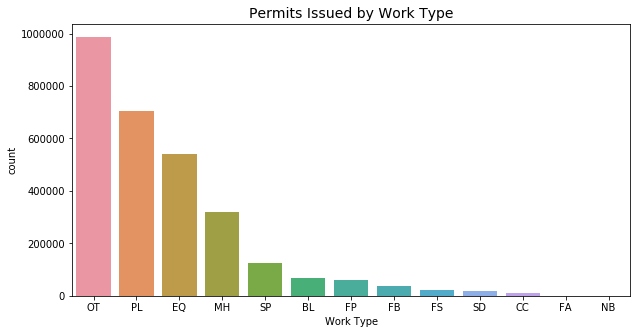

In [21]:
#Plotting the data from highest to lowest Work Type
plt.figure(figsize=(10,5))
sb.countplot(x=df['Work Type'], data=df, order = df['Work Type'].value_counts().index);
plt.title('Permits Issued by Work Type', size=14)

In [22]:
#Sorting in descending order 
df['Work Type'].value_counts().sort_values(ascending=False)

OT    987284
PL    704820
EQ    541297
MH    317848
SP    125859
BL     68934
FP     62103
FB     38909
FS     22562
SD     18789
CC     11341
FA       244
NB         1
Name: Work Type, dtype: int64

In [23]:
df['Filing Status'].unique()

array(['INITIAL', 'RENEWAL'], dtype=object)

In [24]:
#Checking the Count for permits in the two types of Filing status
permits_by_filing_type = df.groupby(df['Filing Status']).size()
permits_by_filing_type

Filing Status
INITIAL    2560687
RENEWAL     949296
dtype: int64

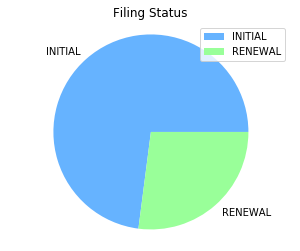

In [25]:
#Visual Representation of the types of Filing Status
colors=['#66b3ff','#99ff99']
labels = df['Filing Status'].unique()
fig1,ax1 = plt.subplots()
ax1.pie(permits_by_filing_type, colors = colors, labels = labels)
ax1.axis('equal')
plt.legend()
plt.title("Filing Status")
plt.show()

In [26]:
#Checking the Count for permits in each Building Types
permits_by_bldg_type = df.groupby(df['Bldg Type']).size()
permits_by_bldg_type

Bldg Type
1.0     834283
2.0    2621223
dtype: int64

Text(0.5,1,'Building Types')

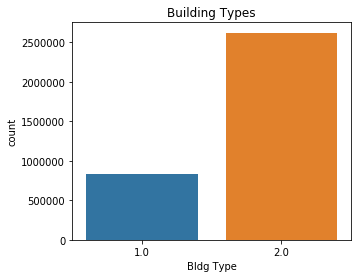

In [27]:
#Bar plot for the count of each Building Type
sb.countplot(x="Bldg Type", data=df);
plt.title("Building Types")

In [28]:
df.groupby(['Residential']).size()

Residential
YES    1369490
dtype: int64

In [29]:
#Percentage of borough permits for residential projects
Boroughs = ['BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND', 'BRONX'] #list of borough names to pass to for loop

for i in Boroughs:
    """
    this for loop returns the percentage of residential permits
    within each borough

    count the number of residential permits then divide by the
    total number of borough permits
    """
    print '\n' + i
    print df[df['Borough'] == i]['Residential'].value_counts() / len(df[df['Borough'] == i])


BROOKLYN
YES    0.482898
Name: Residential, dtype: float64

MANHATTAN
YES    0.260282
Name: Residential, dtype: float64

QUEENS
YES    0.473763
Name: Residential, dtype: float64

STATEN ISLAND
YES    0.604622
Name: Residential, dtype: float64

BRONX
YES    0.422123
Name: Residential, dtype: float64


In [30]:
#Creating a summary for the count of each permit status in each Building Type
df.groupby(["Bldg Type","Permit Status"])["Permit Status"].count()

Bldg Type  Permit Status
1.0        IN PROCESS          4375
           ISSUED            814744
           RE-ISSUED          10705
           REVOKED                1
2.0        IN PROCESS         15436
           ISSUED           2566798
           RE-ISSUED          32737
           REVOKED                3
Name: Permit Status, dtype: int64

In [31]:
#Checking the Count for Permits in each Borough
permits_by_area = df.groupby(['Borough']).size()
permits_by_area

Borough
BRONX             296636
BROOKLYN          814473
MANHATTAN        1462826
QUEENS            731608
STATEN ISLAND     204440
dtype: int64

Text(0.5,1,'Permits in NYC')

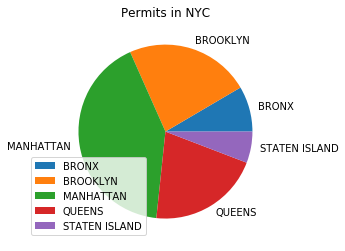

In [32]:
#Permits in different areas of NYC
plt.axis('equal')
permits_by_area.plot(kind='pie', legend=True, label='');
plt.title("Permits in NYC")

In [33]:
#This pie chart shows that Manhattan has higher percentage of permits than all.
#Below shown is a percentage of many permits were issued for each borough.

In [34]:
#Percentage of the total permits issued for Manhattan
len(df[df['Borough'] == 'MANHATTAN']) / len(df) * 100

41.67615626628391

In [35]:
#Percentage of the total permits issued for Bronx
len(df[df['Borough'] == 'BRONX']) / len(df) * 100

8.451209022949683

In [36]:
#Percentage of the total permits issued for Brooklyn
len(df[df['Borough'] == 'BROOKLYN']) / len(df) * 100

23.2044713606875

In [37]:
#Percentage of the total permits issued for Queens
len(df[df['Borough'] == 'QUEENS']) / len(df) * 100

20.843633715604888

In [38]:
#Percentage of the total permits issued for Staten Island
len(df[df['Borough'] == 'STATEN ISLAND']) / len(df) * 100

5.824529634474014

In [39]:
df['Issuance Date'].dtypes

dtype('O')

In [40]:
#Converting Issuance Date and time into Year, Month & Date
df['datetime'] = pd.to_datetime(df['Issuance Date'])
df['Iyear'], df['Imonth'], df['Iday_of_week'] = df.datetime.dt.year, df.datetime.dt.month, df.datetime.dt.dayofweek

In [41]:
#Converting Filing Date and time into into Year, Month & Date
df['Datetime_Filing'] = pd.to_datetime(df['Filing Date'])
df['Filing Year'], df['Filing Month'], df['Filing Day_of_week'] = df.datetime.dt.year, df.datetime.dt.month, df.datetime.dt.dayofweek

In [42]:
#Showing number of permits in each year
permits_by_iyear = df.groupby(['Iyear'])['Iyear'].count()
permits_by_iyear.sort_values(ascending=False, inplace=True)
permits_by_iyear.head()

Iyear
2017.0    195343
2016.0    190998
2015.0    182714
2014.0    170787
2018.0    169334
Name: Iyear, dtype: int64

In [44]:
#Percent change of permits issued over years
df.groupby(df['Iyear']).size().sort_index().pct_change()

Iyear
1989.0         NaN
1990.0    6.758689
1991.0    0.934669
1992.0    0.146652
1993.0    0.103608
1994.0    0.054078
1995.0    0.033962
1996.0    0.057220
1997.0    0.090630
1998.0    0.136378
1999.0    0.110209
2000.0    0.104995
2001.0    0.041696
2002.0    0.058669
2003.0    0.095282
2004.0    0.122533
2005.0    0.090606
2006.0    0.038471
2007.0    0.015328
2008.0   -0.049795
2009.0   -0.097094
2010.0    0.003484
2011.0    0.056517
2012.0    0.031895
2013.0    0.086095
2014.0    0.058671
2015.0    0.069836
2016.0    0.045339
2017.0    0.022749
2018.0   -0.133145
2019.0   -0.764861
dtype: float64

In [46]:
#Showing number of filings in each year
permits_by_fyear = df.groupby(['Filing Year'])['Filing Year'].count()
permits_by_fyear.head()

Filing Year
1989.0     3050
1990.0    23664
1991.0    45782
1992.0    52496
1993.0    57935
Name: Filing Year, dtype: int64

Text(0.5,1,'Building Permits Issued per Year')

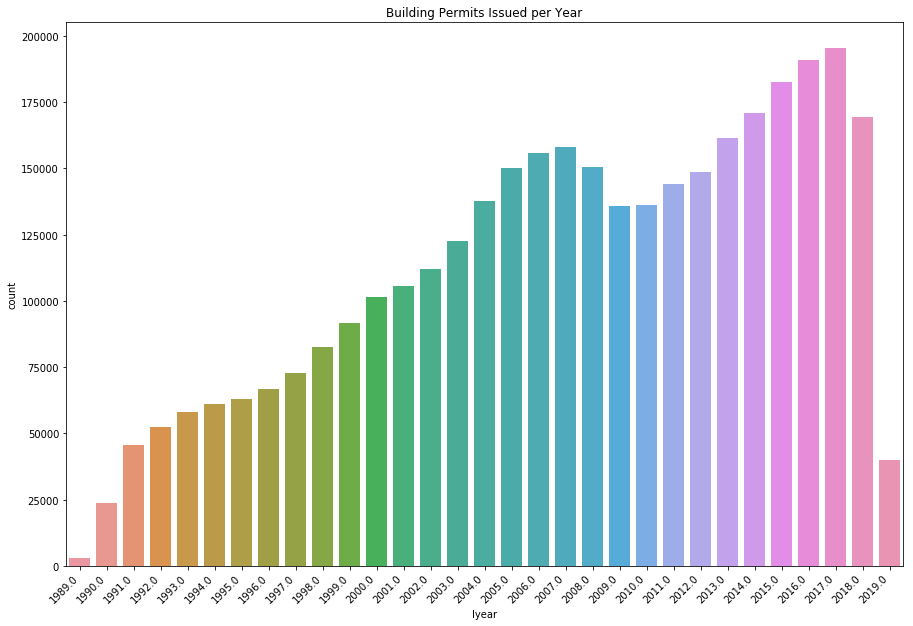

In [47]:
#Plotting Permits issued per year
plt.figure(figsize=(15,10))
g = sb.countplot(x="Iyear", data=df);
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right")
plt.title("Building Permits Issued per Year")

In [48]:
#The chart shows the number of permits issued each year since 1999.
#Most permits have been issued duing the period 2013-2018 with the highest number of permits in 2018
#(The year 2019 has significantly fewer permits because the dataset only covers part of 2019.) 
#Most years had similar permit activity with a slight upward trend. 
#Though small, this increase in permits shows steady growth in construction permits issued. 

Text(0.5,1,'Building Permits Issued per Month')

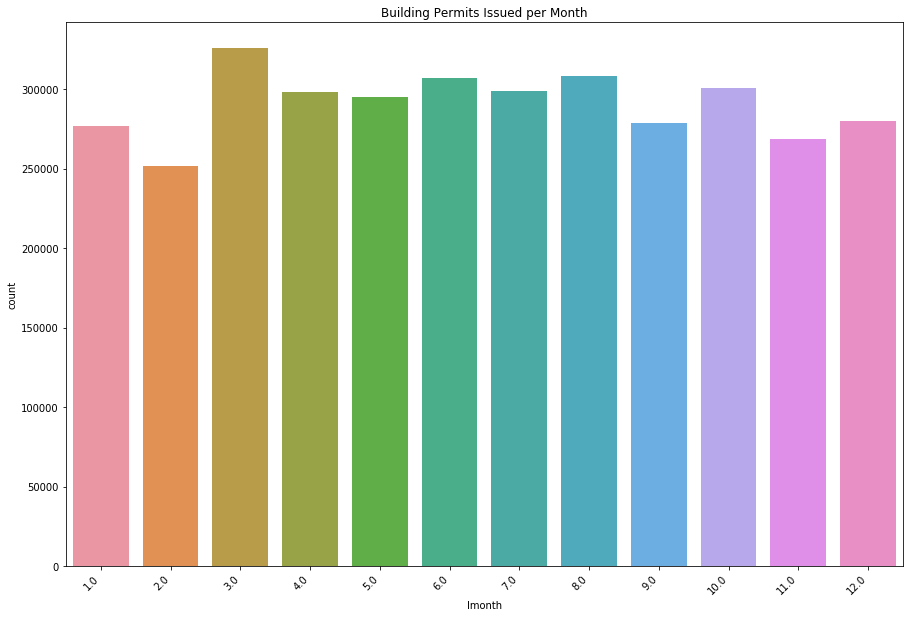

In [49]:
#Plotting Permits issued per month
plt.figure(figsize=(15,10))
g = sb.countplot(x="Imonth", data=df);
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right")
plt.title("Building Permits Issued per Month")

In [50]:
#This bar chart changes to show the number of permits issued by month. 
#Based on the chart, the permit activity has remained constant in all the months with a little fluctuation.
#The highest number of permits were found in the month of March

Text(0.5,1,'Building Permits Issued per Week')

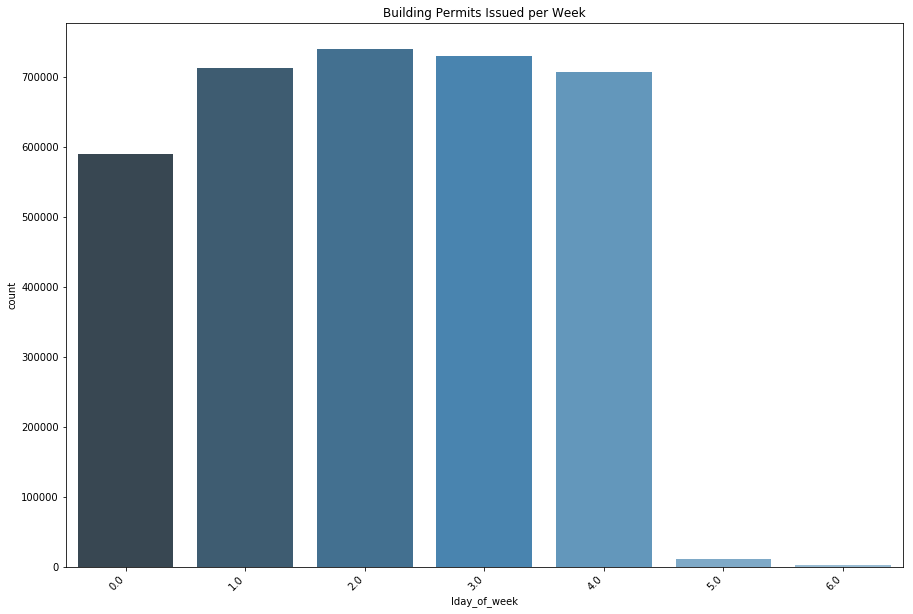

In [51]:
#Plotting Permits issued per day
plt.figure(figsize=(15,10))
g = sb.countplot(x="Iday_of_week", data=df, palette = "Blues_d");
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right")
plt.title("Building Permits Issued per Week")

In [52]:
#Almost all permit activity occurs on weekdays, especially Wednesdays. 
#Government offices are closed during weekends, so few permits are issued on Saturdays & Sundays 
#while Wednesday seems to be the busiest day when most permits are issued

In [53]:
#To view the data continuously,the set_index function with the argument datetime is used to change the index field to 
#the datetime field created earlier when splitting the Issuance Date field.
ddf = df.set_index('datetime')

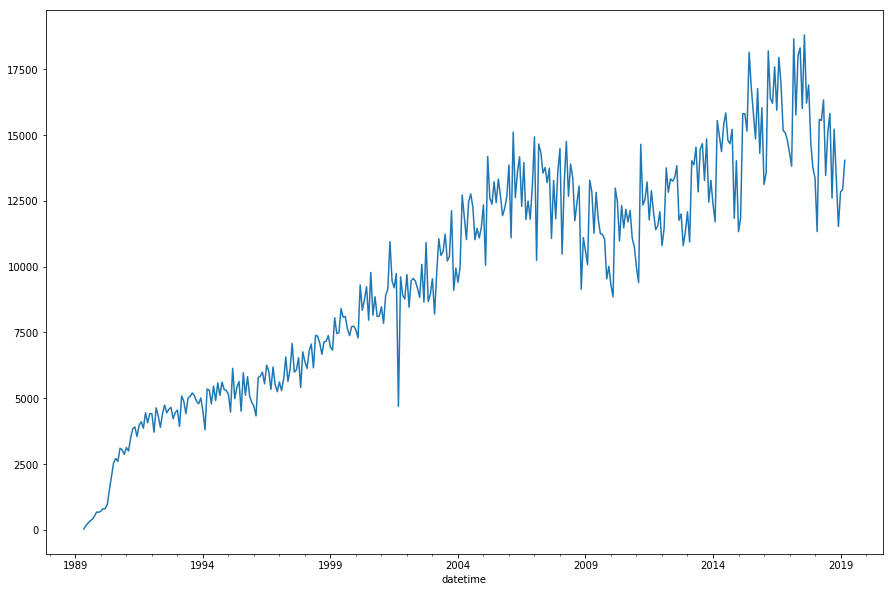

In [54]:
#Using the resample function with the argument (M) to plot the permit totals by month
plt.figure(figsize=(15,10))
ddf['num'] = 1
ddf['num'].resample('M').sum().plot();

In [55]:
#The above graph shows a time series graph about the permits over the complete tenure

Text(0.5,1,'Total permits in different areas by Building Types')

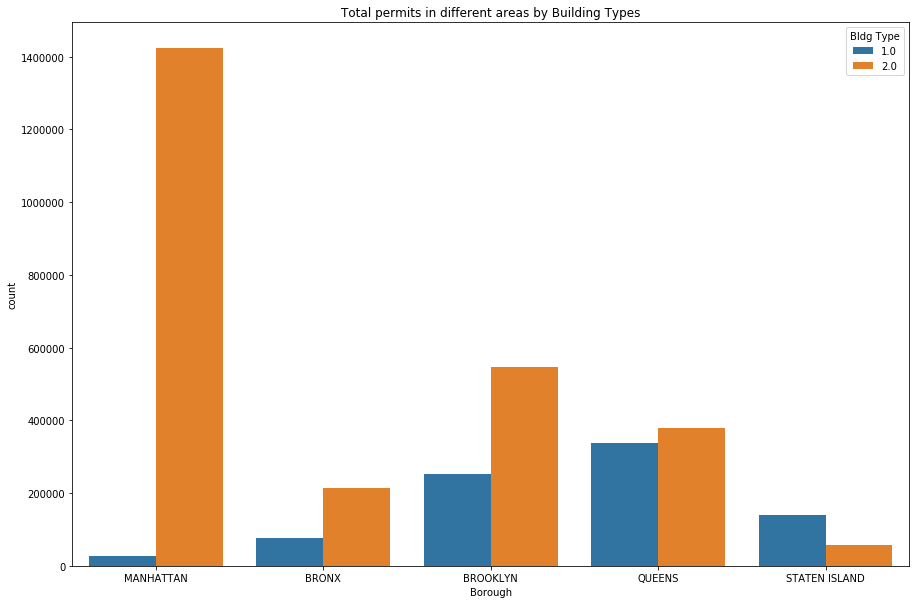

In [56]:
plt.figure(figsize=(15,10))
g = sb.countplot(x="Borough", hue="Bldg Type", data=df);
plt.title("Total permits in different areas by Building Types")

In [57]:
#Manhattan tops the number of permits in Building type 2.
#As it can be seen that most permts are issued for building type 2 across all boroughs.

In [62]:
#Percentage of borough permits for residential projects
Boroughs = ['BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND', 'BRONX'] #list of borough names to pass to for loop

for i in Boroughs:
    """
    this for loop returns the percentage of residential permits
    within each borough

    count the number of residential permits then divide by the
    total number of borough permits
    """
    print '\n' + i
    print (df[df['Borough'] == i]['Residential'].value_counts() * 100)/ len(df[df['Borough'] == i])


BROOKLYN
YES    48.289753
Name: Residential, dtype: float64

MANHATTAN
YES    26.028249
Name: Residential, dtype: float64

QUEENS
YES    47.376327
Name: Residential, dtype: float64

STATEN ISLAND
YES    60.462238
Name: Residential, dtype: float64

BRONX
YES    42.212341
Name: Residential, dtype: float64


Text(0.5,1,'Total permits in different areas by Permit Status')

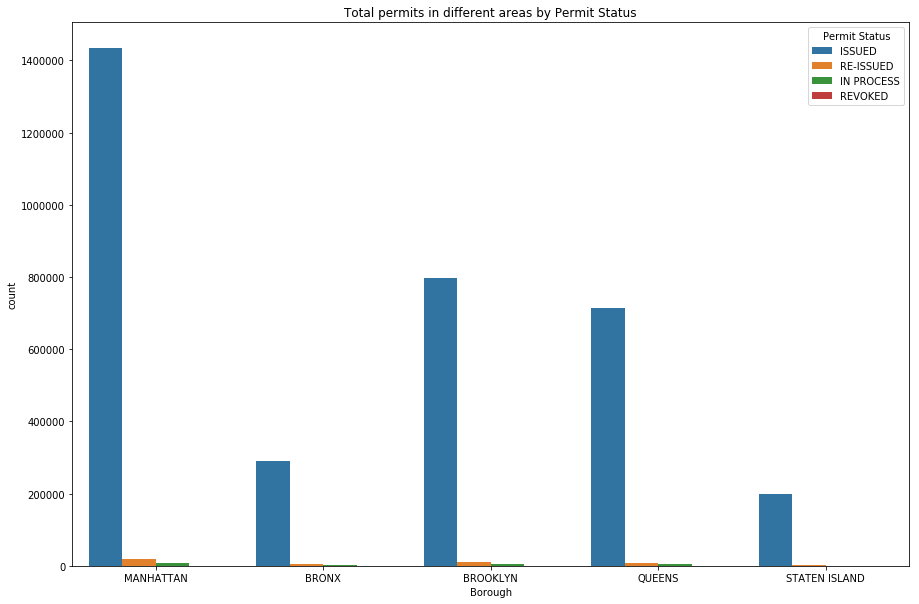

In [63]:
plt.figure(figsize=(15,10))
g = sb.countplot(x="Borough", hue="Permit Status", data=df);
plt.title("Total permits in different areas by Permit Status")

In [64]:
#From this graph we can infer that most of the permits are issued across all boroughs usually with very few permits 
#being Re-issued or being In-process.
#No permits have been revoked in the entire city

<Figure size 1080x720 with 0 Axes>

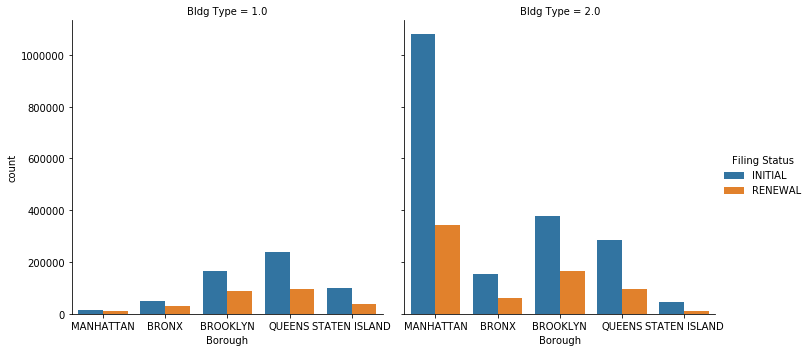

In [65]:
plt.figure(figsize=(15,10))
g = sb.catplot(x="Borough", hue="Filing Status", col="Bldg Type" ,data= df, kind="count");

In [66]:
#Two kinds of filing status have been displayed for each borough based on the two types of buildings
#We can see that Manhattan has a lot of filing status for 'Initial' for Building type 2
#Apart from that we can notice that there is a smaller share of renewals in the entire city for any building types

In [68]:
permits_by_Business_type.head()

Owners Business Type
CORPORATION    1130636
INDIVIDUAL     1107190
PARTNERSHIP     769640
OTHER           155931
CONDO/CO-OP      87125
dtype: int64

In [69]:
filtered_permits = list(permits_by_Business_type.head(3).index)
filtered_permits

['CORPORATION', 'INDIVIDUAL', 'PARTNERSHIP']

In [70]:
filtered_df = df.loc[df["Owners Business Type"].isin(filtered_permits)]

In [71]:
filtered_df.shape

(3007466, 45)

In [72]:
df.shape

(3509983, 45)

Text(0.5,1,'Permits of Owners having different Bussiness types')

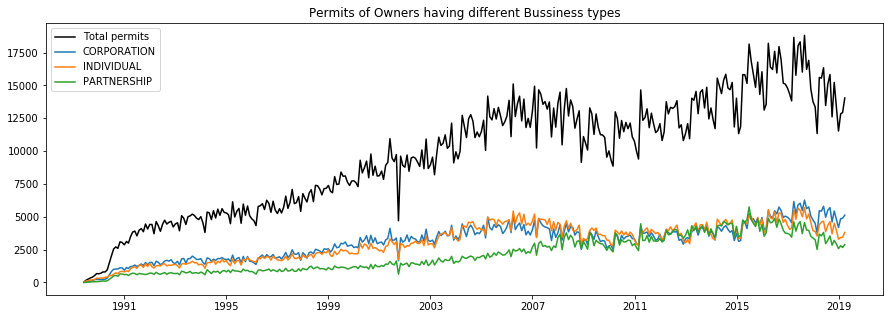

In [73]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(ddf['num'].resample('M').sum(), 'k', label='Total permits')
for use_code in filtered_permits:
    x = ddf[ddf["Owners Business Type"] == use_code]['num'].resample('M').sum()
    ax.plot(x, label=use_code)
ax.legend();
plt.title("Permits of Owners having different Bussiness types")

In [105]:
permits_by_zipcode = df.groupby(['Zip Code']).size()
permits_by_zipcode.sort_values()
permits_by_zipcode.head()

Zip Code
0.0           51
4452.0         9
10000.0      179
10001.0    56454
10002.0    35756
dtype: int64

In [106]:
permits_by_zipcode.shape

(230,)

In [107]:
#The first three listed zipcodes look like errors, so we should get rid of them. Zipcodes for NYC begin at 10000.
df = df[df['Zip Code'] >= 10000]

In [108]:
df['Zip Code'].value_counts().sort_values(ascending=False).head(5)

10022.0    90190
10019.0    74706
10013.0    66613
10011.0    65217
10003.0    64071
Name: Zip Code, dtype: int64

In [109]:
#It is helpful to know the 5 zip codes with the most permits issues but it doesn’t tell me where they are in the city

In [110]:
filtered_permits_zip = list(permits_by_zipcode.sort_values(ascending=False).head(1).index)
filtered_permits_zip

[10022.0]

In [111]:
zip_codes = GeoDataFrame.from_file('/Users/yashpasar/Downloads/ZIP_CODE_040114/ZIP_CODE_040114.shp') 
#read in shape file

In [112]:
zip_codes['zip_code'] = zip_codes['ZIPCODE'].astype(int) #converting zipcode column to integer data type
df['Zip Code'] = df['Zip Code'].astype(int)

In [113]:
#Counting the number of occurrences for each zip code in the data frame, 
# then converting the data series to a data frame for merging.
counts = df['Zip Code'].value_counts()
counts = counts.to_frame(name='count')
counts = counts.reset_index()

In [114]:
counts = GeoDataFrame(counts.merge(zip_codes, how='left', left_on='index', right_on='zip_code'))

In [115]:
counts = counts.dropna() #drop null values

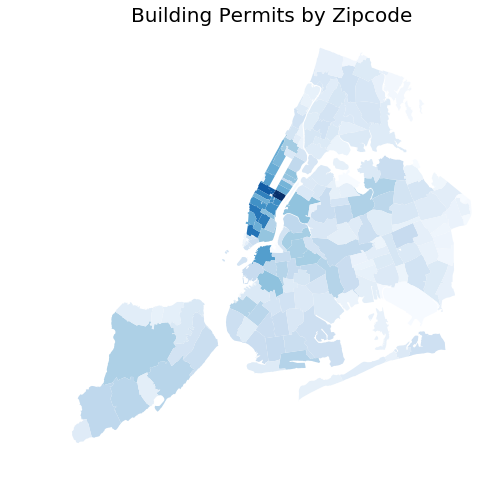

In [116]:
#Plotting the data
fig, ax = plt.subplots(figsize = (8,8))
counts.plot(column='count', cmap='Blues',alpha=1,linewidth=0.1, ax=ax)
plt.title('Building Permits by Zipcode', size=20)
plt.axis('off')
plt.show()

In [117]:
df = df[df['Zip Code'] == 10022]

In [118]:
plt.figure(figsize=(15,10))
g = sb.countplot(x="Iyear", hue="Zip Code", data=df);
plt.title("Total permits in Zipcode 10022 over the years")

ValueError: Could not interpret input 'Iyear'

<Figure size 1080x720 with 0 Axes>

In [89]:
#The heatmap is darker in areas with more permits issued, and lighter in areas with fewer permits issued.

In [90]:
#Visualizing the building permits issued by zipcode provides better context for where permits have been issued. 
#Merging the building data with a shape file allows you to display the density of building permits issued and locate the hotspots.
#For someone unfamiliar with zip codes in New York, the visual representation provides clues to spatial positioning. 
#For example, one can see that the darkest spot is right beneath Central Park, 
#which is more informative than simply identifying the darkest spot as zip code 10022.

In [91]:
#Major highlights of the Investigation:

#Between the years 2014-2018 (2019 is still going so it's not included), the New York City Department of Buildings
#issued over 900,000 building permits, where 448 of them were for work in the borough of Manhattan. 
#There was a 16% drop in the number of building permits issued from the year 2018 to 2019.. 
#In further exploration, one might dig a bit deeper to find out why there was a drop between those years.

#The New York City neighborhood Midtown East (zip code 10022) had the greatest number of permits issued between 2013- 2016.
#Midtown East is the home of the famous 5th Avenue shopping district, St. Patrick’s Cathedral, and a host of other attractions. 
#Considering the area generates a ton of traffic from tourists, shoppers, and workers alike,
#it is unsurprising that a high volume construction work is done to maintain the area and continue to drive the NYC economy. 
#Such construction could have also been in anticipation of the new MTA yellow line train, 
#the Q train, which runs along 2nd avenue on the east side and opened in January 2017.